In [16]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

from qlpdb.graph.models import Graph as graph_Graph
from qlpdb.experiment.models import DWaveExperiment as experiment_Experiment
from qlpdb.data.models import Data as data_Data

from qlp.mds import graph_tools as gt
from qlp.mds.qubo import get_mds_qubo
from qlp.mds.mds_qlpdb import QUBO_to_Ising

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# available graphs
# vertices = 4, 7, 
total_vertices = 4

1


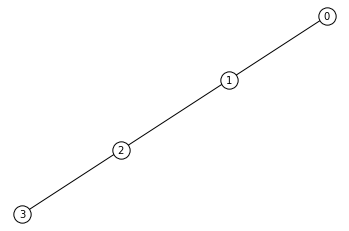

2


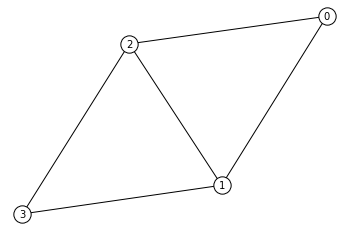

In [18]:
graphs = graph_Graph.objects.filter(total_vertices=total_vertices)
for idx, graph in enumerate(graphs):
    # plot graph
    adjacency_map = graph.adjacency
    gt.get_plot(adjacency_map, directed=False)
    print(graph.id)
    plt.show()

In [19]:
# Choose graph to read out
graph_id = 2

In [20]:
for idx, experiment in enumerate(experiment_Experiment.objects.filter(graph_id = graph_id)):
    print(experiment.id)
    print(experiment)

1
DWaveExperiment[Experiment](machine=Advantage_system1.1, settings={'num_reads': 1000, 'auto_scale': True, 'answer_mode': 'raw', 'annealing_time': 800, 'chain_strength': 8.0, 'readout_thermalization': 0, 'programming_thermalization': 1000, 'num_spin_reversal_transforms': 0}, settings_hash=a28cd1f58c9d677c03a5580887738add, p=2.00, chain_strength=8.0, tag=FixEmbedding_Binary_0_0_z0)


In [21]:
# Choose experiment parameters
experiment_id = 1

In [22]:
# Print QUBO and Ising
penalty = float(experiment_Experiment.objects.get(id=experiment_id).p)
adjacency_map = {tuple(edge) for edge in graph_Graph.objects.get(id = graph_id).adjacency}
qubo = get_mds_qubo(adjacency_map, penalty=penalty, directed=False, triangularize=True, dtype="d")
print("QUBO formulation")
print(qubo.todense())
J, h, C = QUBO_to_Ising(qubo.todense().tolist())
print("Ising formulation")
print(J)
print(h)
print(C)
#data_Data.objects.filter(experiment_id = experiment_id)

QUBO formulation
[[-5. 12. 12.  8. -4. -8. -4. -8. -4. -8.  0.  0.]
 [ 0. -7. 16. 12. -4. -8. -4. -8. -4. -8. -4. -8.]
 [ 0.  0. -7. 12. -4. -8. -4. -8. -4. -8. -4. -8.]
 [ 0.  0.  0. -5.  0.  0. -4. -8. -4. -8. -4. -8.]
 [ 0.  0.  0.  0.  6.  8.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6.  8.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 16.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  6.  8.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.]]
Ising formulation
[[ 0.  3.  3.  2. -1. -2. -1. -2. -1. -2.  0.  0.]
 [ 0.  0.  4.  3. -1. -2. -1. -2. -1. -2. -1. -2.]
 [ 0.  0.  0.  3. -1. -2. -1. -2. -1. -2. -1. -2.]
 [ 0.  0.  0.  0.  0.  0. -1. -2. -1. -2. -1. -2.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0. 

<BarContainer object of 10 artists>

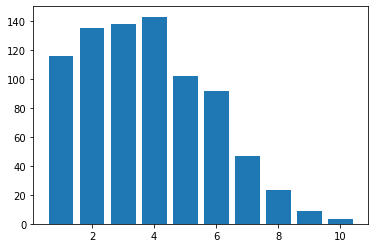

In [27]:
# get data
energy = dict()
for row in data_Data.objects.filter(experiment_id = experiment_id):
    if row.energy in energy:
        energy[row.energy] += 1
    else:
        energy[row.energy] = 1
x = np.sort(list(energy.keys()))
y = [energy[i] for i in x]
plt.bar(x=x, height=y)